In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = './life_expectancy_by_country.csv'

## Source
[Kaggle](https://www.kaggle.com/datasets/ulrikthygepedersen/life-expectancy)

In [17]:
life_expectancy = pd.read_csv(csv_path)
life_expectancy = life_expectancy.set_index('country_code')
life_expectancy.head()

,country_name,year,value
country_code,,,
ABW,Aruba,1960,64.152
ABW,Aruba,1961,64.537
ABW,Aruba,1962,64.752
ABW,Aruba,1963,65.132
ABW,Aruba,1964,65.294


# Objective
## Get a general idea of the history of life expectancy
Make a scatter plot that represents in the y-axes the life expectancy and on the x-axes the year the data was collected

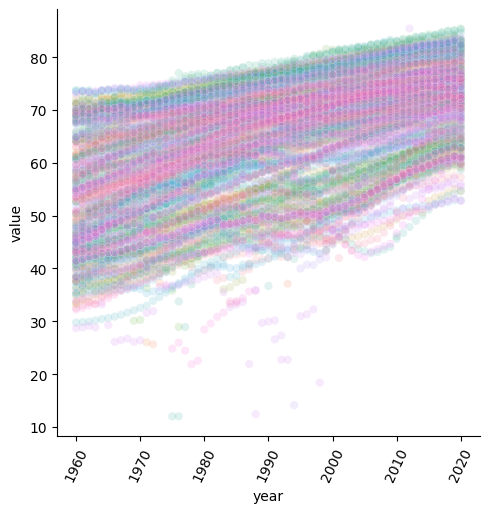

<Figure size 640x480 with 0 Axes>

In [18]:
sns.relplot(x='year', y='value', data=life_expectancy, kind='scatter', hue='country_name', alpha=.15, legend=False)
plt.xticks(rotation=65)
plt.show()
plt.clf()

# Objective
## Get the historic lowest life expectancies

In [19]:
historic_10_lowest = life_expectancy.sort_values('value', ascending=True).iloc[:10, :]
print('Historic 10 lowest life expectancies:', historic_10_lowest, sep='\n')

Historic 10 lowest life expectancies:
             country_name  year   value
country_code                           
KHM              Cambodia  1975  11.995
KHM              Cambodia  1976  12.013
SSD           South Sudan  1988  12.407
RWA                Rwanda  1994  14.098
SSD           South Sudan  1998  18.385
TLS           Timor-Leste  1978  21.837
SSD           South Sudan  1987  21.912
TLS           Timor-Leste  1979  22.529
SSD           South Sudan  1993  22.704
SSD           South Sudan  1992  22.724


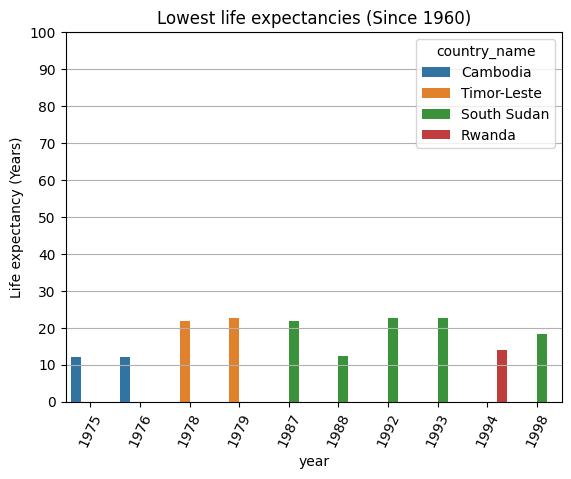

<Figure size 640x480 with 0 Axes>

In [20]:
sns.barplot(x='year', y='value', data=historic_10_lowest.sort_values('year', ascending=True), hue='country_name')
plt.xticks(rotation=65)
plt.yticks(list(np.arange(0, 110, 10)))
plt.grid(visible=True, which='both', axis='y')
plt.ylabel('Life expectancy (Years)')
plt.title('Lowest life expectancies (Since 1960)')
plt.show()
plt.clf()

# Objective
## See the evolution of the countries that have had the lowest life expectancies in history.

In [21]:
tracked_countries = historic_10_lowest.value_counts('country_name').index
tracked_countries = life_expectancy[life_expectancy['country_name'].isin(tracked_countries)]
tracked_countries.value_counts('country_name')

country_name
Cambodia       61
Rwanda         61
South Sudan    61
Timor-Leste    61
dtype: int64

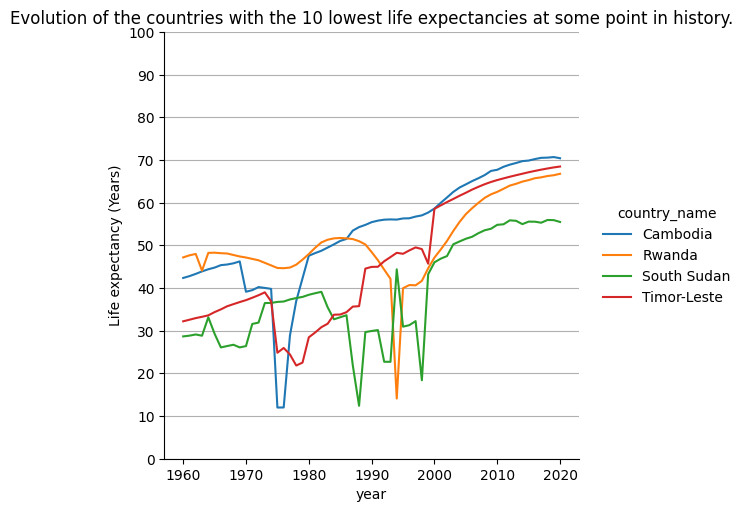

In [22]:
sns.relplot(x='year', y='value', hue='country_name', data=tracked_countries, kind='line')
plt.title('Evolution of the countries with the 10 lowest life expectancies at some point in history.')
plt.ylabel('Life expectancy (Years)')
plt.yticks(list(np.arange(0, 110, 10)))
plt.grid(visible=True, which='Major', axis='y')

### Results
Most of them have proven to be able to get its life expectancy near 70 years of life, except for, South Sudan that its life expectancy doesn't reach 60 years of life nowadays.

# Objective
## How life expectancy has changed over the evolution of the pandemic
The objective of this part of the file is to know wich countries are the top 10 with the lowest life expectancy in 2018, 2019 and 2020 in separate because of the pandemic, later I'll compare those values of all countries to see wich countries were most affected by the first full year of the COVID-19 pandemic, while also comparing some countries that are famous for being affected by the pandemic or because they are global superpowers.

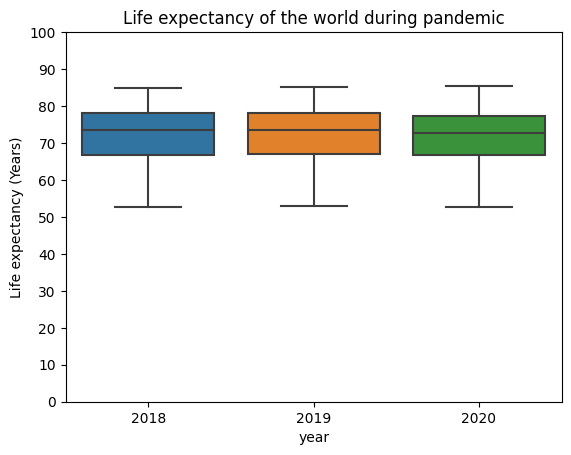

<Figure size 640x480 with 0 Axes>

In [23]:
pandemic_years = [2018, 2019, 2020, 2021]
pandemic_life_expectancy = life_expectancy[life_expectancy['year'].isin(pandemic_years)]
sns.boxplot(x='year', y='value', data=pandemic_life_expectancy)
plt.yticks(list(np.arange(0, 110, 10)))
plt.ylabel('Life expectancy (Years)')
plt.title('Life expectancy of the world during pandemic')
plt.show()
plt.clf()


### Preliminary results
We see a little decrease in life expectancy on 2020, lets use some hypotheses testing to formalize the decrease.

### Objective
#### Prove this hypotheses: 'On 2020 the life expectancy decreased compared to 2019'
(I'll use data from 2019 instead of 2018 because of life expectancy increase)
 * H0: The life expectancy in 2019 is the same than the life expectancy of 2020 (L.E.2018 - L.E.2020 = 0)
 * Ha: The life expectancy in 2019 is greater than the life expectancy of 2020 (L.E.2018 - L.E.2020 > 0)

I'm going to use two sample proportion test with an alpha value of .25 to go for a 75% confidence about the result

In [24]:
alpha = .25

life_expectancy_2019 = life_expectancy[life_expectancy['year'] == 2019]
life_expectancy_2020 = life_expectancy[life_expectancy['year'] == 2020]

n_2019 = len(life_expectancy_2019)
mean_2019 = life_expectancy_2019['value'].mean()

n_2020 = len(life_expectancy_2020)
mean_2020 = life_expectancy_2020['value'].mean()


sample_size_2019 = n_2019 // 2
sample_size_2020 = n_2020 // 2

# As the output depends on chance and there are only 260 countries in the dataset I'll get the mean p-value to get results that don't vary so much
p_values = []
for i in range(100):
    sample_2019 = life_expectancy_2019.sample(sample_size_2019, replace=False)['value']
    sample_2020 = life_expectancy_2020.sample(sample_size_2020, replace=False)['value']

    sample_mean_2019 = sample_2019.mean()
    sample_mean_2020 = sample_2020.mean()
    sample_std_2019 = sample_2019.std()
    sample_std_2020 = sample_2020.std()

    standard_error = ((sample_std_2019 ** 2) / sample_size_2019 + (sample_std_2020 ** 2) / sample_size_2020) ** (1 / 2)

    t_value = ((sample_mean_2020 - sample_mean_2019) - (mean_2020 - mean_2019)) / standard_error

    degrees_of_freedom = n_2019 + n_2020 - 2

    from scipy.stats import t
    p_value = 1 - t.cdf(t_value, df=degrees_of_freedom)
    p_values.append(p_value)

p_value = np.mean(p_values)

In [25]:
print(f'p-value: {p_value}')
print(f'We can say that the alternate hypotheses is {alpha > p_value} but it could be True with {round((1 - p_value) * 100)}% of confidence.')

p-value: 0.5246857058212879
We can say that the alternate hypotheses is False but it could be True with 48% of confidence.


With such inconclusive results rounding 50% I'll just present some summary statistics.

In [26]:
percentiles_2019 = np.quantile(life_expectancy_2019['value'], [.05, .25, .75, .95])
percentiles_2020 = np.quantile(life_expectancy_2020['value'], [.05, .25, .75, .95])

median_2019 = np.median(life_expectancy_2019['value'])
median_2020 = np.median(life_expectancy_2020['value'])

max_value_2019 = np.max(life_expectancy_2019['value'])
max_value_2020 = np.max(life_expectancy_2020['value'])

min_value_2019 = np.min(life_expectancy_2019['value'])
min_value_2020 = np.min(life_expectancy_2020['value'])

In [27]:
print('Life Expectancy:')
print('    2019')
print(f'            mean:           {mean_2019}')
print(f'            median:         {median_2019}')
print(f'            min value:      {min_value_2019}')
print(f'            5% percentile:  {percentiles_2019[0]}')
print(f'            75% percentile: {percentiles_2019[1]}')
print(f'            25% percentile: {percentiles_2019[2]}')
print(f'            95% percentile: {percentiles_2019[3]}')
print(f'            max value:      {max_value_2019}')
print('    2020')
print(f'            mean:           {mean_2020}')
print(f'            median:         {median_2020}')
print(f'            min value:      {min_value_2020}')
print(f'            5% percentile:  {percentiles_2020[0]}')
print(f'            75% percentile: {percentiles_2020[1]}')
print(f'            25% percentile: {percentiles_2020[2]}')
print(f'            95% percentile: {percentiles_2020[3]}')
print(f'            max value:      {max_value_2020}')

Life Expectancy:
    2019
            mean:           72.68293095020138
            median:         73.59899999999999
            min value:      52.91
            5% percentile:  60.3739
            75% percentile: 67.10975
            25% percentile: 78.2348922864152
            95% percentile: 82.92634146341466
            max value:      85.0780487804878
    2020
            mean:           72.06960886996774
            median:         72.7508448722839
            min value:      52.777
            5% percentile:  59.7534
            75% percentile: 66.797
            25% percentile: 77.393
            95% percentile: 82.36926829268292
            max value:      85.3878048780488


#### Result
 * We see a decrease in life expectancy in all global statistics expect for the max life expectancy proving the hypotheses, altough, the data isn't significative enough for the test of hypotheses to answer the question.

#### Track really affected countries and countries with power

In [44]:
tracked_countries = ['United States', 'China', 'Russian Federation', 'Spain', 'Italy', 'Japan']

tracked_life_expectancy = life_expectancy[life_expectancy['country_name'].isin(tracked_countries)]
tracked_life_expectancy.value_counts(subset='country_name')

country_name
China                 61
Italy                 61
Japan                 61
Russian Federation    61
Spain                 61
United States         61
dtype: int64

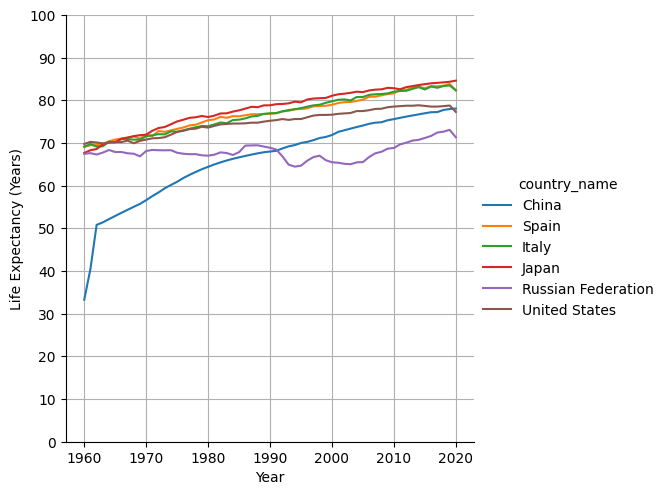

<Figure size 640x480 with 0 Axes>

In [45]:
sns.relplot(x='year', y='value', hue='country_name', kind='line', data=tracked_life_expectancy)
plt.grid(True, 'major', 'both')
plt.xlabel('Year')
plt.yticks(list(np.arange(0, 110, 10)))
plt.ylabel('Life Expectancy (Years)')
plt.show()
plt.clf()

##### Result
 * All countries had a decrease in reported life expectancy except for Japan and China wich has had the most extreme measures against COVID-19.
 * It's interesting to note that countries like Spain and Italy have higher life expectancies than Global Superpowers like the US or China and having them so close to Japan.